In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


In [35]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
train_Data = "/content/drive/MyDrive/train"
test_Data="/content/drive/MyDrive/val"

In [3]:
import matplotlib.pyplot as plt


In [4]:
def plotimages(images_arr):
  fig,axes = plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
tr_data_gen = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip = True,
                             fill_mode = 'nearest',

                             )

In [6]:
tr_data = tr_data_gen.flow_from_directory('/content/drive/MyDrive/train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='binary')

Found 1951 images belonging to 4 classes.


In [7]:
tr_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [8]:
te_data_gen=ImageDataGenerator(1./255)

In [9]:
te_data = te_data_gen.flow_from_directory("/content/drive/MyDrive/val",
                                       target_size=(150,150),
                                               batch_size=32,
                                               class_mode='binary')

Found 324 images belonging to 4 classes.


In [10]:
# images = [tr_data[0][0][0] for i in range(20)]
# plotimages(images)

In [11]:
m_path = '/content/drive/MyDrive/Model'
checkpoint = ModelCheckpoint(m_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
cllbacks_list = [checkpoint]

In [12]:
model = keras.Sequential([
                                    keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[150,150,3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128,kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256,kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=128,activation='relu'),
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256,activation='relu'),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=4,activation='softmax')
])

model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
history = model.fit(tr_data,
                    epochs=100,
                    verbose=1,
                    validation_data=te_data,
                    callbacks=cllbacks_list)

Epoch 1/100
61/61 [==============================] - ETA: 0s - loss: 1.2050 - accuracy: 0.4803 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: val_accuracy improved from -inf to 0.65123, saving model to /content/drive/MyDrive/Model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/assets
61/61 [==============================] - 1206s 20s/step - loss: 1.2050 - accuracy: 0.4803 - val_loss: 77.3322 - val_accuracy: 0.6512
Epoch 2/100
61/61 [==============================] - ETA: 0s - loss: 0.9849 - accuracy: 0.6156

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00002: val_accuracy improved from 0.65123 to 0.68210, saving model to /content/drive/MyDrive/Model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/assets
61/61 [==============================] - 33s 539ms/step - loss: 0.9849 - accuracy: 0.6156 - val_loss: 62.7301 - val_accuracy: 0.6821
Epoch 3/100
61/61 [==============================] - ETA: 0s - loss: 0.8534 - accuracy: 0.6638

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00003: val_accuracy improved from 0.68210 to 0.70370, saving model to /content/drive/MyDrive/Model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/assets
61/61 [==============================] - 33s 540ms/step - loss: 0.8534 - accuracy: 0.6638 - val_loss: 70.2868 - val_accuracy: 0.7037
Epoch 4/100
61/61 [==============================] - ETA: 0s - loss: 0.8777 - accuracy: 0.6453

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00004: val_accuracy improved from 0.70370 to 0.73765, saving model to /content/drive/MyDrive/Model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/assets
61/61 [==============================] - 33s 542ms/step - loss: 0.8777 - accuracy: 0.6453 - val_loss: 42.4150 - val_accuracy: 0.7377
Epoch 5/100
61/61 [==============================] - ETA: 0s - loss: 0.7625 - accuracy: 0.7017

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00005: val_accuracy improved from 0.73765 to 0.79321, saving model to /content/drive/MyDrive/Model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/assets
61/61 [==============================] - 33s 536ms/step - loss: 0.7625 - accuracy: 0.7017 - val_loss: 56.1126 - val_accuracy: 0.7932
Epoch 6/100
61/61 [==============================] - ETA: 0s - loss: 0.7180 - accuracy: 0.7104

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00006: val_accuracy did not improve from 0.79321
61/61 [==============================] - 30s 500ms/step - loss: 0.7180 - accuracy: 0.7104 - val_loss: 60.1465 - val_accuracy: 0.7377
Epoch 7/100
61/61 [==============================] - ETA: 0s - loss: 0.6789 - accuracy: 0.7555
Epoch 00007: val_accuracy did not improve from 0.79321
61/61 [==============================] - 30s 498ms/step - loss: 0.6789 - accuracy: 0.7555 - val_loss: 124.1368 - val_accuracy: 0.7377
Epoch 8/100
61/61 [==============================] - ETA: 0s - loss: 0.5673 - accuracy: 0.7842
Epoch 00008: val_accuracy did not improve from 0.79321
61/61 [==============================] - 30s 498ms/step - loss: 0.5673 - accuracy: 0.7842 - val_loss: 54.2916 - val_accuracy: 0.7901
Epoch 9/100
61/61 [==============================] - ETA: 0s - loss: 0.5277 - accuracy: 0.7883
Epoch 00009: val_accuracy improved from 0.79321 to 0.88889, saving model to /content/drive/MyDrive/Model
INFO:tensorflow:Assets written to: /content/

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00010: val_accuracy did not improve from 0.88889
61/61 [==============================] - 30s 500ms/step - loss: 0.5624 - accuracy: 0.7893 - val_loss: 92.9990 - val_accuracy: 0.7068
Epoch 11/100
61/61 [==============================] - ETA: 0s - loss: 0.5043 - accuracy: 0.8052
Epoch 00011: val_accuracy did not improve from 0.88889
61/61 [==============================] - 30s 499ms/step - loss: 0.5043 - accuracy: 0.8052 - val_loss: 153.0589 - val_accuracy: 0.7037
Epoch 12/100
61/61 [==============================] - ETA: 0s - loss: 0.4689 - accuracy: 0.8165
Epoch 00012: val_accuracy did not improve from 0.88889
61/61 [==============================] - 31s 500ms/step - loss: 0.4689 - accuracy: 0.8165 - val_loss: 43.5992 - val_accuracy: 0.7994
Epoch 13/100
61/61 [==============================] - ETA: 0s - loss: 0.4512 - accuracy: 0.8339
Epoch 00013: val_accuracy did not improve from 0.88889
61/61 [==============================] - 30s 497ms/step - loss: 0.4512 - accuracy: 0.8339 -

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00017: val_accuracy did not improve from 0.91049
61/61 [==============================] - 30s 499ms/step - loss: 0.3555 - accuracy: 0.8703 - val_loss: 126.6225 - val_accuracy: 0.6605
Epoch 18/100
61/61 [==============================] - ETA: 0s - loss: 0.3423 - accuracy: 0.8688
Epoch 00018: val_accuracy did not improve from 0.91049
61/61 [==============================] - 30s 493ms/step - loss: 0.3423 - accuracy: 0.8688 - val_loss: 85.2358 - val_accuracy: 0.7562
Epoch 19/100
61/61 [==============================] - ETA: 0s - loss: 0.3314 - accuracy: 0.8765
Epoch 00019: val_accuracy did not improve from 0.91049
61/61 [==============================] - 30s 499ms/step - loss: 0.3314 - accuracy: 0.8765 - val_loss: 147.8736 - val_accuracy: 0.6019
Epoch 20/100
61/61 [==============================] - ETA: 0s - loss: 0.3147 - accuracy: 0.8852
Epoch 00020: val_accuracy did not improve from 0.91049
61/61 [==============================] - 30s 495ms/step - loss: 0.3147 - accuracy: 0.8852 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00059: val_accuracy improved from 0.91358 to 0.93827, saving model to /content/drive/MyDrive/Model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/assets
61/61 [==============================] - 32s 531ms/step - loss: 0.2270 - accuracy: 0.9211 - val_loss: 33.5580 - val_accuracy: 0.9383
Epoch 60/100
61/61 [==============================] - ETA: 0s - loss: 0.2240 - accuracy: 0.9241

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00060: val_accuracy did not improve from 0.93827
61/61 [==============================] - 30s 494ms/step - loss: 0.2240 - accuracy: 0.9241 - val_loss: 113.7138 - val_accuracy: 0.7562
Epoch 61/100
61/61 [==============================] - ETA: 0s - loss: 0.2015 - accuracy: 0.9226
Epoch 00061: val_accuracy did not improve from 0.93827
61/61 [==============================] - 30s 488ms/step - loss: 0.2015 - accuracy: 0.9226 - val_loss: 267.0319 - val_accuracy: 0.5586
Epoch 62/100
61/61 [==============================] - ETA: 0s - loss: 0.2540 - accuracy: 0.9206
Epoch 00062: val_accuracy did not improve from 0.93827
61/61 [==============================] - 30s 488ms/step - loss: 0.2540 - accuracy: 0.9206 - val_loss: 109.6676 - val_accuracy: 0.7840
Epoch 63/100
61/61 [==============================] - ETA: 0s - loss: 0.2292 - accuracy: 0.9206
Epoch 00063: val_accuracy did not improve from 0.93827
61/61 [==============================] - 30s 486ms/step - loss: 0.2292 - accuracy: 0.9206

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00092: val_accuracy did not improve from 0.94444
61/61 [==============================] - 30s 495ms/step - loss: 0.1566 - accuracy: 0.9431 - val_loss: 158.3519 - val_accuracy: 0.6944
Epoch 93/100
61/61 [==============================] - ETA: 0s - loss: 0.1945 - accuracy: 0.9431
Epoch 00093: val_accuracy did not improve from 0.94444
61/61 [==============================] - 30s 494ms/step - loss: 0.1945 - accuracy: 0.9431 - val_loss: 24.9396 - val_accuracy: 0.9012
Epoch 94/100
61/61 [==============================] - ETA: 0s - loss: 0.1677 - accuracy: 0.9487
Epoch 00094: val_accuracy did not improve from 0.94444
61/61 [==============================] - 30s 492ms/step - loss: 0.1677 - accuracy: 0.9487 - val_loss: 166.5954 - val_accuracy: 0.6821
Epoch 95/100
61/61 [==============================] - ETA: 0s - loss: 0.1551 - accuracy: 0.9493
Epoch 00095: val_accuracy did not improve from 0.94444
61/61 [==============================] - 30s 493ms/step - loss: 0.1551 - accuracy: 0.9493 

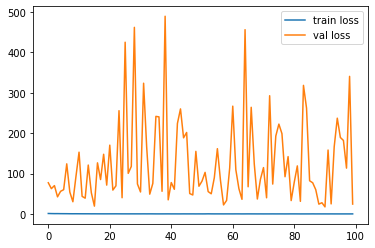

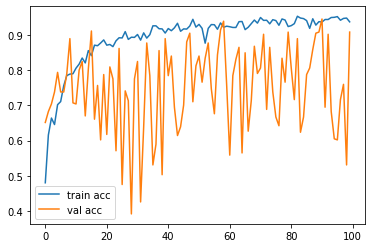

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
cd ..

/


In [19]:
from tensorflow.keras.models import load_model

model.save('model_new.h5')

In [22]:
model=load_model('model_new.h5')

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [43]:
img=image.load_img('/content/drive/MyDrive/test/fresh cotton plant/dsd (405).jpg',target_size=(150,150))


In [44]:
x=image.img_to_array(img)
x.shape

(150, 150, 3)

In [45]:
x=x/255

In [46]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 150, 150, 3)

In [47]:
x.shape

(1, 150, 150, 3)

In [48]:
model.predict(img_data)

array([[7.5733766e-08, 4.4696761e-05, 8.2876795e-06, 9.9994683e-01]],
      dtype=float32)

In [49]:
a=np.argmax(model.predict(img_data), axis=1)

In [53]:
a==3

array([ True])